# Assignment 2 for Course 1MS041
Make         sure you pass the `# ... Test` cells and
 submit your solution notebook in the corresponding assignment on the course website. You can submit multiple times before the deadline         and your highest score will be used.

---
## Assignment 2, PROBLEM 1
Maximum Points = 8


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [1.5p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [1.5p]
3. Is this Markov chain irreducible? [1.5p]
4. What is the stationary distribution? [1.5p]
5. Advanced question: What is the expected number of steps until the first time one enters the downtown region having started in the suburbs region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. [2p]



In [16]:
# Part 1
import numpy as np
M_markov = np.array([
    [.3,.4,.3],
    [.2,.5,.3],
    [.4,.3,.3]
])
def step_probs(P, V0, n):
    v_i = np.array(V0)
    for i in range(n):
        v_i = np.dot(v_i,P)
    return v_i


M_two_steps = step_probs(M_markov,[0,1,0],2)
# Fill in the answer to part 1 below as a decimal number
problem1_p1 = .28

In [17]:
# Part 2
import random
def markov_step(P, current_pos):
    options = [i for i in range(len(M_markov))]
    weights = P[current_pos,:]
    next_pos = random.choices(options,weights, k=1)
    return next_pos[0]

def random_walk(break_condition, P, initial_pos):
    steps = 0
    current_pos = initial_pos
    while not break_condition(current_pos, steps):
        steps += 1
        current_pos = markov_step(P, current_pos)
    return [steps, current_pos]
####################
myBreak = lambda pos, steps: pos == 0 or steps == 2
n_simulations = 100000
temp = []
for i in range(n_simulations):
    x = random_walk(myBreak,M_markov, 1)
    temp.append(x)

print(len([x for x in temp if x[0] == 2 and x[1] == 0])/n_simulations) #if num steps = 2 and current pos = 0

# Fill in the answer to part 2 below as a decimal number
problem1_p2 = .22

0.2197


In [18]:
# Part 3
M_converge = M_markov.copy()
delta = 1
count = 1
while delta > .000001:
    count+=1
    pre = np.trace(M_converge)
    M_converge = np.matmul(M_converge,M_markov)
    post = np.trace(M_converge)
    delta = abs(pre-post)
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True

In [19]:
# Part 4
print(M_converge[0,:])
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = M_converge[0,:]

[0.2888889 0.4111111 0.3      ]


In [20]:
# Part 5
# 3.846 (answer)
n_simulations = 1000000
myBreak = lambda pos, steps: pos == 0
temp = []
for i in range(n_simulations):
    n_steps = random_walk(myBreak,M_markov, 1)[0]
    temp.append(n_steps)
print(np.average(temp))
    
# Fill in the answer to part 5 below
# That is, the expected number of steps as a decimal number
problem1_ET = 3.846

3.848645


---
## Assignment 2, PROBLEM 2
Maximum Points = 8


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits (for a year) for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv`, follow the instructions in the code cell of how this should happen [1.5p]
2. Create the `problem2_X` and the `problem2_y` as numpy arrays with `problem2_X` being the features and `problem2_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [1.5p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [1.5p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [1.5p]
5. Compute the mean absolute error of your prediction on the test set and use Hoeffdings inequality to produce a 95\% confidence interval for the mean absolute error. We can make the assumption that the error is bounded by 70 for simplicity. [2p]


In [21]:
# Part 1
import csv
import numpy as np
data_raw = []
header = None
with open("data/visits clean.csv",mode="r") as f:
    header = f.readline().rsplit()
    current_pos = f.tell()
    current_line = f.readline()
    while (current_line[0] == '#'):
        current_pos = f.tell()
        current_line = f.readline()
    f.seek(current_pos)
    csv_reader = csv.reader(f,delimiter=' ',skipinitialspace=True)
    for line in csv_reader:
        data_raw.append(np.array(line, dtype=float))
print(data_raw[0])
# As in assignment 1 we will load the header into header and data into data
# this time you will have to parse the data such that each data entry is a float
# and that the problem2_data is a numpy array of shape (n_samples,n_columns)
# where n_columns is the number of columns and should have the same length as
# the list of strings header. n_samples is how many rows of data we had.
# If you cannot find the file, check the starting package as it should be updated
# if not, go to the github repo and pull it

# The autograder does not accept pandas as a solution to this problem.
# data/visits_clean.csv
problem2_header = ['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'exclhlth', 'poorhlth', 'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'male', 'married', 'school', 'faminc', 'employed', 'privins', 'medicaid'] #List of strings
problem2_data = np.array(data_raw) #A numpy array of shape n_samples n_columns

[5.    0.    0.    0.    0.    1.    0.    0.    2.    0.    0.    0.
 0.    6.9   1.    1.    6.    2.881 1.    1.    0.   ]


In [22]:
from sklearn.model_selection import train_test_split
# Part 2
# print(f'headers length is width of matrix: {len(problem2_data[0]) == len(problem2_header)}')
# y_ofp = problem2_data[:,0]
# x_all = problem2_data[:,1:]
# print(x_all[0])
# Fill in your X and y below
y = problem2_data[:,0]
x_all = problem2_data[:,1:]
print(f'y dim {y.shape}, x_all dim {x_all.shape}, OG raw dim {problem2_data.shape}, all headers dim {len(problem2_header)}')
x_headers = np.array(problem2_header[1:])
print(f' all headers: {x_headers}')
selected_vars = ['hosp', 'exclhlth', 'poorhlth', 'numchron',
                 'noreast', 'midwest', 'west', 'age', 
                 'male', 'school', 'employed',
                 'privins','medicaid']
indices = np.where(np.isin(x_headers, selected_vars))[0]
x_filtered = x_all[:,indices]
# keep the train size as 0.8 rounded up to the nearest integer sample

problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(x_filtered, y, test_size=.1999, random_state=101)
print(f'x_train dim {problem2_X_train.shape}, x_test dim {problem2_X_test.shape}, y_train dim {problem2_y_train.shape}, y_test dim {problem2_y_test.shape}')
print(y)

y dim (4406,), x_all dim (4406, 20), OG raw dim (4406, 21), all headers dim 21
 all headers: ['ofnp' 'opp' 'opnp' 'emr' 'hosp' 'exclhlth' 'poorhlth' 'numchron'
 'adldiff' 'noreast' 'midwest' 'west' 'age' 'male' 'married' 'school'
 'faminc' 'employed' 'privins' 'medicaid']
 selected vars = ['hosp', 'exclhlth', 'numchron', 'privins']
corr selected = [[ 1.         -0.07663095  0.23352422 -0.01056898]
 [-0.07663095  1.         -0.17067735  0.03391507]
 [ 0.23352422 -0.17067735  1.         -0.04405851]
 [-0.01056898  0.03391507 -0.04405851  1.        ]]
x_train dim (3525, 4), x_test dim (881, 4), y_train dim (3525,), y_test dim (881,)


In [23]:
# Part 3

# Fill in the function loss below

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        # The parameter lambda for the given X and the proposed values 
        # of the coefficients, here coeff[:-1] represent alpha 
        # and coeff[-1] represent beta
        lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])
        
        # use the Y variable that is available here to define 
        # the loss function, return the value of the loss for 
        # this Y and for this parameter lam defined above
        # l = np.average(-(lam**Y)*np.exp(-lam))
        l = np.average(lam - Y * np.log(lam))
        return l

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])

In [24]:
# Part 4
###########################
# def compare_models():
#     from sklearn.linear_model import PoissonRegressor
#     n_test = len(problem2_y_test)
#     
#     poisson = PoissonRegressor(alpha=.001, max_iter=1000)
#     poisson.fit(problem2_X_train,problem2_y_train)
#     sk_c = np.array(poisson.coef_)
#     sk_c = np.append(sk_c, poisson.intercept_)
#     p_r2 = poisson.score(problem2_X_test,problem2_y_test)
#     sk_errors = poisson.predict(problem2_X_test) - problem2_y_test
#     home_made = 1 - sum(sk_errors ** 2) / sum((problem2_y_test - np.average(problem2_y_test)) ** 2)
#     p_mae = np.average(sk_errors)
#     #boostrap CIs for betas
#     bootstrap_coeffs = []
#     for b in range(1000):
#         sample_indexes = np.random.choice(len(problem2_y_train), len(problem2_y_train),replace=True)
#         sampled_x = problem2_X_train[sample_indexes]
#         sampled_y = problem2_y_train[sample_indexes]
#         temp_poisson = PoissonRegressor(alpha=.001, max_iter=1000)
#         temp_poisson.fit(sampled_x,sampled_y)
#         temp_coef = np.array(temp_poisson.coef_)
#         temp_coef = np.append(temp_coef, temp_poisson.intercept_)
#         bootstrap_coeffs.append(temp_coef)
#     bootstrap_coeffs = np.array(bootstrap_coeffs)
#     lower_ci = np.quantile(bootstrap_coeffs,.05, axis=0)
#     upper_ci = np.quantile(bootstrap_coeffs,.95, axis=0)
#     CIS = list(zip(lower_ci, sk_c, upper_ci, [*selected_vars, 'B_0']))
#     print(CIS) 
#     
#     #our model
#     my_poisson = PoissonRegression()
#     my_poisson.fit(problem2_X_train,problem2_y_train)
#     my_c = my_poisson.coeffs
#     my_errors = my_poisson.predict(problem2_X_test) - problem2_y_test
#     my_r2 = 1 - sum(my_errors ** 2) / sum((problem2_y_test - np.average(problem2_y_test)) ** 2)
#     my_mae = np.average(my_errors)
# 
#     print('########-compare models-#########')
#     print('coefficients')
#     print(f'\t coeff difference (sk-mine) = {sk_c - my_c}')
#     print(f'\t avg c difference = {np.average(sk_c - my_c)}')
#     print(f'R Squared')
#     print(f'\t sk R2 = {p_r2}, home_made = {home_made}')
#     print(f'\t my R2 = {my_r2}')
#     print(f'diff, skR2-myR2 = {p_r2 - my_r2}')
#     print('Mean error')
#     print(f'\t sk ME = {p_mae}')
#     print(f'\t my ME = {my_mae}')
#     print('boostrap CIs')
#     for c in CIS:
#         print(f'\t {c}')
#     # boostrap CIs for 1000 iterations
#     # (-0.051981132263361325, -0.01188186660887246, 0.03667009327452677, 'emr')[0.94846784 0.98818844 1.03224116] removed
#     # (0.12152020545308574, 0.15500814721631045, 0.19720710790772802, 'hosp')[1.12996944 1.16766747 1.21573073]
#     # (-0.45518726132139664, -0.32118245603931134, -0.18143519775248418, 'exclhlth')[0.63061502 0.72529091 0.8449146 ]
#     # (0.1608762138099832, 0.25842741958909937, 0.35916482596724353, 'poorhlth')[1.17252883 1.29489216 1.43700107]
#     # (0.12527556836198162, 0.1483924739457269, 0.17080865073074117, 'numchron')[1.1329389  1.15996806 1.18792973]
#     # (-0.08101503631226298, 0.019963466247867247, 0.11551352952514875, 'adldiff')[0.92640304 1.02016407 1.12084281] removed
#     # (0.02571817997757781, 0.11480374633158225, 0.1995804495068658, 'noreast')[1.0247743  1.12165329 1.23441386]
#     # (-0.11721226711690297, -0.040140292974903236, 0.03514446013828946, 'midwest')[0.88593656 0.96065466 1.0324871 ]
#     # (0.029610375752088903, 0.11708153164600026, 0.20255553342817145, 'west')[1.03440652 1.12421108 1.22281705]
#     # (-0.0981641691240655, -0.048185268805641855, -0.0014238436335303995, 'age')[0.9058648  0.95295722 1.0065172 ]
#     # (-0.14648100477486536, -0.07741694901904034, -0.0036361845262724993, 'male')[0.86203456 0.92550389 0.98846508]
#     # (-0.11875108725078953, -0.048202529142308485, 0.023518454350398482, 'married')[0.88830061 0.95294077 1.02988576] removed
#     # (0.019410316004985224, 0.030329267410029875, 0.04027739092749005, 'school')[1.02107351 1.03079388 1.04124047]
#     # (-0.01810280992330458, -0.005840786864778757, 0.004467678840538555, 'faminc')[0.98179777 0.99417624 1.0039432 ] removed
#     # (-0.08155808270884925, 0.042581257686671904, 0.17483105969884236, 'employed')[0.92095277 1.04350085 1.17790462]
#     # (0.24496624155563745, 0.333971287787868, 0.4286871175177293, 'privins')[1.27642779 1.39650305 1.52724869]
#     # (0.16427609343242555, 0.27858764059206537, 0.39128309225122737, 'medicaid')[1.17352068 1.3212624  1.47204255]
#     # (0.8248582094848533, 1.1923625817317618, 1.5716228075061625, 'B_0')[2.19738199 3.29485639 4.86279074]
#     print('#########-END-########')
# 
#     return CIS
# poisson_sk = compare_models()
#############################
# Initialize your PoissonRegression model
problem2_model = PoissonRegression()

# Fit your initialized model on the training data
problem2_model.fit(problem2_X_train,problem2_y_train)

# This is to make sure that everything went well, 
# check that success is True
print(problem2_model.result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -4.732206155829733
       x: [ 1.605e-01 -3.204e-01  1.669e-01  2.675e-01  1.209e+00]
     nit: 48
     jac: [-5.066e-06 -8.285e-06 -9.298e-06 -7.868e-06  1.550e-06]
    nfev: 540
    njev: 90


In [25]:
# Part 5
print(f'length of covariates == selected X plus 1? {(len(problem2_model.result.x) == len(selected_vars)+1)}')
# Put the computed mean absolute error in the variable below
predictions = problem2_model.predict(problem2_X_test)
my_mae = np.average(abs(predictions - problem2_y_test))
print(f'my_mae={my_mae}')
problem2_metric = my_mae
# Put a confidence interval in the variable below by using Hoeffdings inequality using the bounds
# a = 0, b=70 (roughly 5 days between visits as minimum)
def do_hoeffnings_95(mean_abs_error,n, a, b):
    e = np.sqrt(-((b-a)**2/(2*n))*np.log(1/40))
    print(f'epsilon = {e}')
    lu = ((mean_abs_error - e), (mean_abs_error + e))
    print(f'MAE CI: {lu}')
    return lu
# the variable should contain a tuple representing the confidence interval of the form (l_edge,r_edge)
problem2_interval = do_hoeffnings_95(my_mae, len(problem2_y_test), 0, 70)

length of covariates == selected X plus 1? True
my_mae=4.165406875969526
epsilon = 3.202892184529445
MAE CI: (0.9625146914400813, 7.3682990604989715)


---
## Assignment 2, PROBLEM 3
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from 

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

In [26]:

def problem3_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    x = seed # the seed
    m = 2**31 - 1
    a = 1103515245
    b = 12345
    retValue = [x % m]
    for i in range(2, size+1, 1):
        x = (a * x + b) % m # the generator, using modular arithmetic
        retValue.append(x) # append the new x to the list
    return retValue


In [27]:
def problem3_uniform(generator=None, period = 1, size=None, seed=0):
    import numpy as np
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem1_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """
    rvs = np.array(generator(size,seed))
    
    return rvs/period

In [28]:
def problem3_accept_reject(uniformGenerator=None, n_iterations=None, seed=0):
    import numpy as np
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers 
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution.
    Runs n_iterations
    
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    n_iterations : an integer denoting how many attempts should be made in the accept-reject sampler
    
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    
    p0 = lambda number:(np.pi / 2) * np.abs(np.sin(2*np.pi*number))
    rv_dom = uniformGenerator(size=n_iterations,seed=seed)
    rv_ran = uniformGenerator(size=n_iterations, seed=rv_dom[-1])
    #todo see if it matters that we use our generator
    non_rejects = []
    for rv in range(n_iterations):
        dom = rv_dom[rv]
        ran = rv_ran[rv]*np.pi/2
        if ran <= p0(dom):
            non_rejects.append(dom)
    
    return np.array(non_rejects)

---
#### Local Test for Assignment 2, PROBLEM 3
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

LCG output: [1, 1103527590, 944465040, 1695244727, 1008001095, 235077491, 776026401, 964188548, 19180611, 1753372583]
Uniform sampler [4.65661288e-10 5.13870078e-01 4.39800807e-01 ... 4.08403495e-01
 3.86372610e-01 6.49435609e-02]
Accept-Reject sampler [4.65661288e-10 7.89409842e-01 1.09466487e-01 ... 2.86926150e-01
 7.03027547e-01 2.69546410e-01]


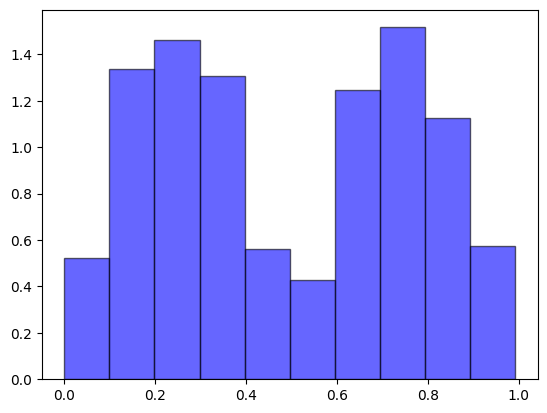

In [29]:

# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

def do_graphs(rv_array):
    import matplotlib.pyplot as plt
    # plotEMF(makeEMF(rv_array))
    plt.hist(rv_array, density=True, alpha=0.6, color='blue', edgecolor='black')


print("LCG output: %s" % problem3_LCG(size=10, seed = 1))

period = 2**31 - 1

print("Uniform sampler %s" % problem3_uniform(generator=problem3_LCG, period = period, size=10000, seed=1))
uniform_sampler = lambda size,seed: problem3_uniform(generator=problem3_LCG, period = period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem3_accept_reject(uniformGenerator = uniform_sampler,n_iterations=200000,seed=1))

# do_graphs(problem3_uniform(generator=problem3_LCG, period = period, size=2000000, seed=1))
do_graphs(problem3_accept_reject(uniformGenerator = uniform_sampler,n_iterations=2000,seed=1))

In [30]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below

def testUniformGenerator(size,seed):
    import random
    random.seed(seed)
    
    return [random.uniform(0,1) for s in range(size)]

print("Accept-Reject sampler %s" % problem3_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))

Accept-Reject sampler [0.84743374 0.76377462 0.25506903 0.78872335 0.02834748 0.8357651
 0.76228008 0.72154003 0.22876222]
